### Open File

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pickle
from collections import Counter
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, precision_score, recall_score

### Create Data Frame

In [3]:
df_model = pickle.load(open('./sav/df_model.sav', 'rb'))
df_subset = pickle.load(open('./sav/df_subset.sav', 'rb'))
df = df_model.drop(df_subset.index).sample(n=2000, random_state=2222)

In [4]:
y = df['Category']
X = df[df.columns[1:-1]]

### Final Predictions

In [5]:
models = pickle.load(open('./sav/model_f1.sav', 'rb'))

In [6]:
clf = models[2]
pred = clf.predict(X)
print("Accuracy :", round(accuracy_score(pred, y),4))
print("F1-Score :", round(f1_score(pred, y, pos_label="Bad"),4))
print("Precision:", round(precision_score(pred, y, pos_label="Bad"),4))
print("Recall   :", round(recall_score(pred, y, pos_label="Bad"),4))
pd.crosstab(np.array(pred), y) # * 100 / len(y)

Accuracy : 0.621
F1-Score : 0.3777
Precision: 0.7188
Recall   : 0.2561


Category,Bad,Good
row_0,,
Bad,230,668
Good,90,1012


#### Cut Off Adjustment

In [7]:
prob =clf.predict_proba(X)[:,0]

In [8]:
threshold = 0.505
pred = ["Bad" if i >= threshold else "Good" for i in prob]

In [9]:
print("Accuracy :", round(accuracy_score(pred, y),4))
print("F1-Score :", round(f1_score(pred, y, pos_label="Bad"),4))
print("Precision:", round(precision_score(pred, y, pos_label="Bad"),4))
print("Recall   :", round(recall_score(pred, y, pos_label="Bad"),4))
pd.crosstab(np.array(pred), y) # * 100 / len(y)

Accuracy : 0.6465
F1-Score : 0.3889
Precision: 0.7031
Recall   : 0.2688


Category,Bad,Good
row_0,,
Bad,225,612
Good,95,1068


### Confidence Interval

In [10]:
pred_ac, pred_pr, pred_rc, pred_f1 = [], [], [], []

In [11]:
np.random.seed(1)
for i in range(1000):
    sample = np.random.randint(0, len(X), size=len(X))
    X_sample = np.array(pred)[sample]
    y_sample = np.array(y)[sample]
    print(i, end='\r', flush=True)
    pred_ac.append(accuracy_score(y_sample, X_sample))
    pred_f1.append(f1_score(y_sample, X_sample, pos_label="Bad"))
    pred_rc.append(recall_score(y_sample, X_sample, pos_label="Bad"))
    pred_pr.append(precision_score(y_sample, X_sample, pos_label="Bad"))

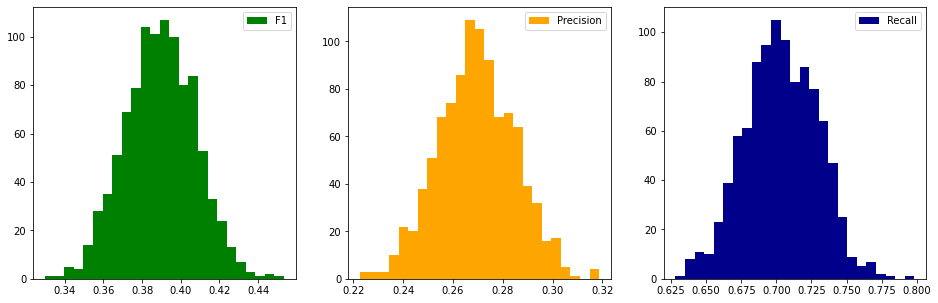

In [12]:
fig, ax=plt.subplots(1, 3, figsize=(16, 5))
ax[0].hist(pred_f1, bins=25, label='F1', color='green')
ax[1].hist(pred_pr, bins=25, label='Precision', color='orange')
ax[2].hist(pred_rc, bins=25, label='Recall', color="darkblue")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [13]:
print('             0.5%    50%  99.5%')
print('Accuracy :',f'{np.percentile(pred_ac,0.5):.4f}',f'{np.percentile(pred_ac,50):.4f}',f'{np.percentile(pred_ac,99.5):.4f}')
print('F1       :',f'{np.percentile(pred_f1,0.5):.4f}',f'{np.percentile(pred_f1,50):.4f}',f'{np.percentile(pred_f1,99.5):.4f}')
print('Precision:',f'{np.percentile(pred_pr,0.5):.4f}',f'{np.percentile(pred_pr,50):.4f}',f'{np.percentile(pred_pr,99.5):.4f}')
print('Recall   :',f'{np.percentile(pred_rc,0.5):.4f}',f'{np.percentile(pred_rc,50):.4f}',f'{np.percentile(pred_rc,99.5):.4f}')

             0.5%    50%  99.5%
Accuracy : 0.6215 0.6465 0.6760
F1       : 0.3432 0.3895 0.4354
Precision: 0.2287 0.2696 0.3069
Recall   : 0.6399 0.7030 0.7667
